In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('dataset/train.csv', index_col=0)
test = pd.read_csv('dataset/test.csv', index_col=0)
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
id,,,,,,,,,,,,,,,
0,32,Private,309513,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
1,33,Private,205469,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
2,46,Private,149949,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
3,23,Private,193090,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,0
4,55,Private,60193,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0


# 변수를 타입별로 분류

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17480 entries, 0 to 17479
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             17480 non-null  int64 
 1   workclass       15644 non-null  object
 2   fnlwgt          17480 non-null  int64 
 3   education       17480 non-null  object
 4   education.num   17480 non-null  int64 
 5   marital.status  17480 non-null  object
 6   occupation      15637 non-null  object
 7   relationship    17480 non-null  object
 8   race            17480 non-null  object
 9   sex             17480 non-null  object
 10  capital.gain    17480 non-null  int64 
 11  capital.loss    17480 non-null  int64 
 12  hours.per.week  17480 non-null  int64 
 13  native.country  16897 non-null  object
 14  target          17480 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 2.1+ MB


In [4]:
drop_features = ['race', 'sex', 'native.country']
categorical_features = [col for col in data.columns if data[col].dtype == 'object' and col not in drop_features]
numerical_features = [col for col in data.columns if data[col].dtype == 'int64' and col not in drop_features]

# 결측값 처리

In [5]:
data.drop(drop_features, axis=1, inplace=True)
test.drop(drop_features, axis=1, inplace=True)

In [6]:
def findMissIndex(df, mis_var_feature):
    index = data[data[mis_var_feature].isnull()].index
    return index
mis_occ_indices = findMissIndex(data, 'occupation')
data.drop(mis_occ_indices, axis=0, inplace=True)

In [7]:
print(data.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
capital.gain      0
capital.loss      0
hours.per.week    0
target            0
dtype: int64


# 수치형 데이터 확인

In [8]:
numerical_features

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'target']

## age

age
SKEW: 0.5348430104734611
KURT: -0.13923606669507294


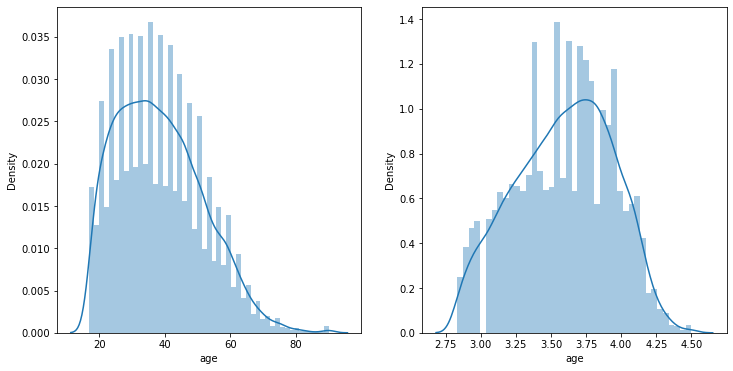

In [9]:
var = numerical_features[0]
print(var)
print('SKEW:',data[var].skew())
print('KURT:',data[var].kurt())
f, ax = plt.subplots(1,2,figsize=(12,6))
sns.distplot(data[var], ax=ax[0])
sns.distplot(np.log(data[var]), ax=ax[1])
data[f'log_{var}']=np.log1p(data[var])
test[f'log_{var}']=np.log1p(test[var])

## fnlwgt

fnlwgt
SKEW: 1.4168041613653444
KURT: 6.229880450491939


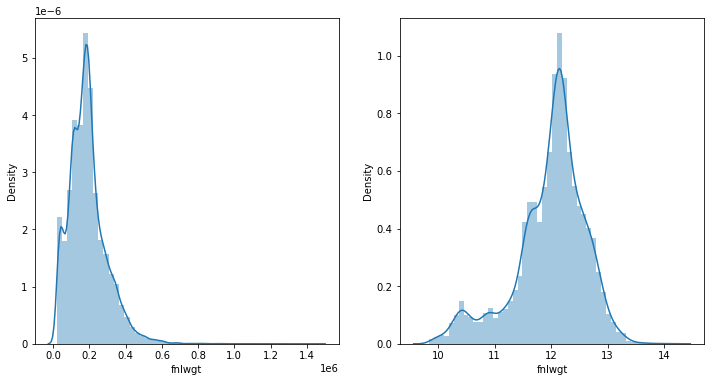

In [10]:
var = numerical_features[1]
print(var)
print('SKEW:',data[var].skew())
print('KURT:',data[var].kurt())
f, ax = plt.subplots(1,2,figsize=(12,6))
sns.distplot(data[var], ax=ax[0])
sns.distplot(np.log(data[var]), ax=ax[1])
data[f'log_{var}']=np.log1p(data[var])
test[f'log_{var}']=np.log1p(test[var])

## education.num

education.num


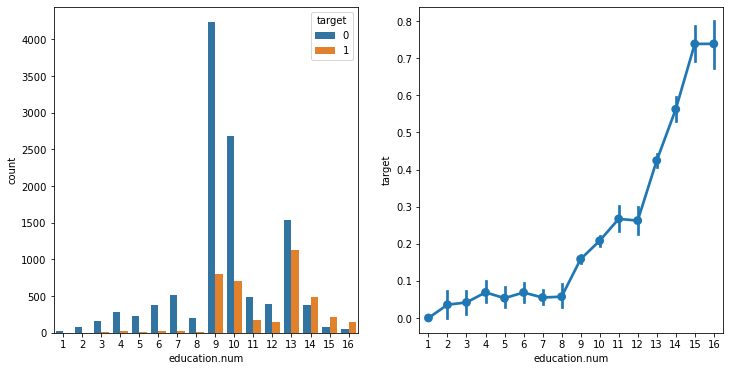

In [11]:
var = numerical_features[2]
print(var)
f, ax = plt.subplots(1,2,figsize=(12,6))
sns.countplot(x=var, hue='target', data=data, ax=ax[0])
sns.pointplot(y='target', x=var, data=data, ax=ax[1])
plt.show()


In [12]:
data['edu'] = 0
index = data[(data['education.num']==9) | (data['education.num']==10)].index
data.loc[index, 'edu'] = 1
index = data[(data['education.num']==11) | (data['education.num']==12)].index
data.loc[index, 'edu'] = 2
index = data[(data['education.num']>=13)].index
data.loc[index, 'edu'] = 3

test['edu'] = 0
index = test[(test['education.num']==9) | (test['education.num']==10)].index
test.loc[index, 'edu'] = 1
index = test[(test['education.num']==11) | (test['education.num']==12)].index
test.loc[index, 'edu'] = 2
index = test[(test['education.num']>=13)].index
test.loc[index, 'edu'] = 3

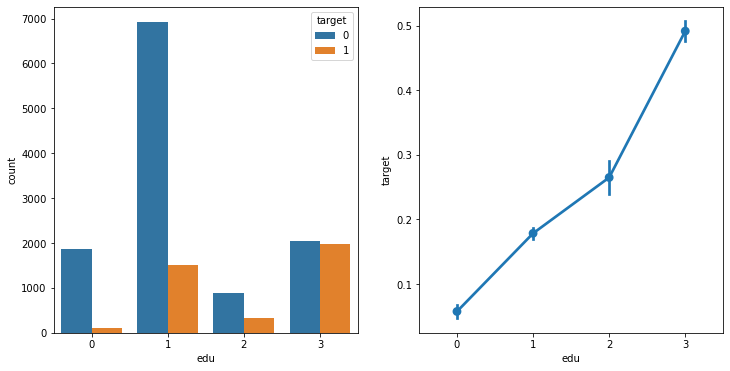

In [13]:
f, ax = plt.subplots(1,2,figsize=(12,6))
sns.countplot(x='edu', hue='target', data=data, ax=ax[0])
sns.pointplot(y='target', x='edu', data=data, ax=ax[1])
plt.show()

## capital.gain

capital.gain
SKEW: 11.585543862862904
KURT: 144.55567256393434


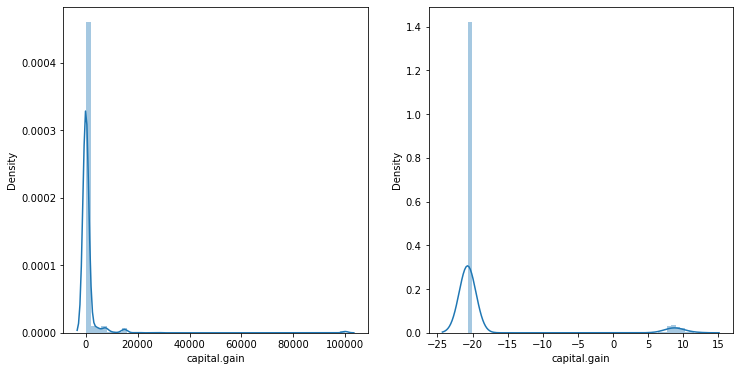

In [14]:
var = numerical_features[3]
print(var)
print('SKEW:',data[var].skew())
print('KURT:',data[var].kurt())
f, ax = plt.subplots(1,2,figsize=(12,6))
sns.distplot(data[var], ax=ax[0])
sns.distplot(np.log(data[var]+1e-9), ax=ax[1])
data[f'log_{var}']=np.log1p(data[var])
test[f'log_{var}']=np.log1p(test[var])

## capital.loss

capital.loss
SKEW: 4.579334775373474
KURT: 20.048770717083567


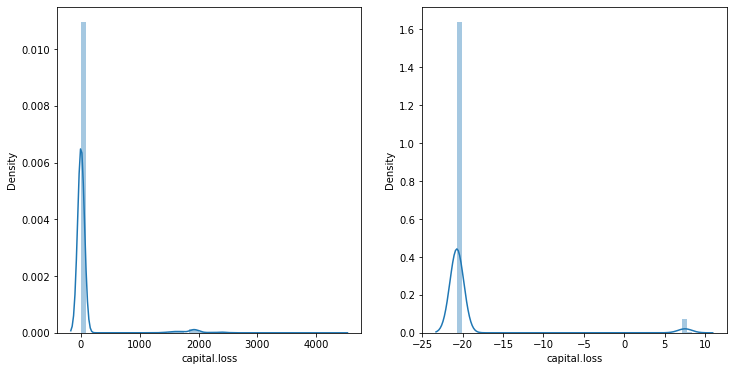

In [15]:
var = numerical_features[4]
print(var)
print('SKEW:',data[var].skew())
print('KURT:',data[var].kurt())
f, ax = plt.subplots(1,2,figsize=(12,6))
sns.distplot(data[var], ax=ax[0])
sns.distplot(np.log(data[var]+1e-9), ax=ax[1])
data[f'log_{var}']=np.log1p(data[var])
test[f'log_{var}']=np.log1p(test[var])

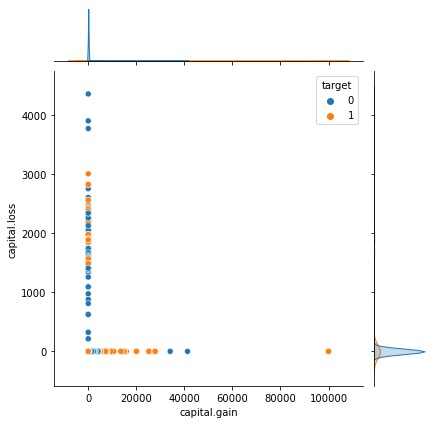

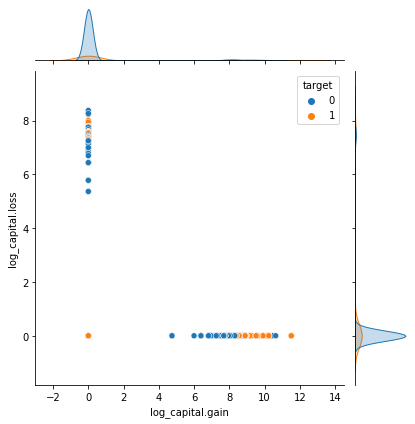

In [16]:
sns.jointplot(x="capital.gain", y="capital.loss", hue='target',data=data)
sns.jointplot(x="log_capital.gain", y="log_capital.loss", hue='target',data=data)
plt.show()

## hours.per.week

hours.per.week
MEAN: 40.95670525036772
STD: 12.027718289682902
MEAN: 3.684714515332766
STD: 0.35835603490131085


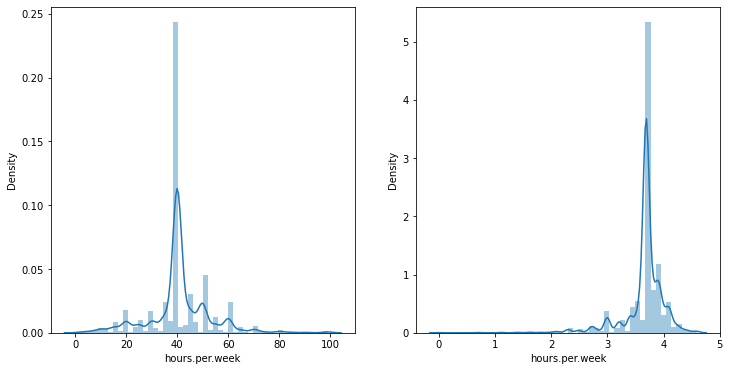

In [17]:
var = numerical_features[5]
print(var)
print('MEAN:',data[var].mean())
print('STD:',data[var].std())
f, ax = plt.subplots(1,2,figsize=(12,6))
sns.distplot(data[var], ax=ax[0])
sns.distplot(np.log(data[var]+1e-9), ax=ax[1])
data[f'log_{var}']=np.log1p(data[var])
test[f'log_{var}']=np.log1p(test[var])
print('MEAN:',data[f'log_{var}'].mean())
print('STD:',data[f'log_{var}'].std())

# Categorical Features

In [18]:
categorical_features

['workclass', 'education', 'marital.status', 'occupation', 'relationship']

## workclass

workclass


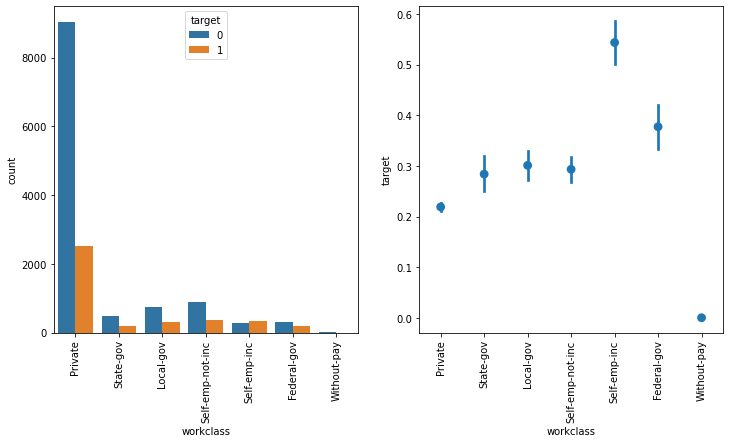

In [19]:
var = categorical_features[0]
print(var)
f, ax = plt.subplots(1,2,figsize=(12,6))

sns.countplot(x=var,hue='target',data=data, ax=ax[0])
plt.sca(ax[0])
plt.xticks(rotation=90)

sns.pointplot(x=var,y='target',data=data, ax=ax[1], join=False)
plt.sca(ax[1])
plt.xticks(rotation=90)

plt.show()

In [20]:
def workclass(data, var):
    data[f'new_{var}']='level0'

    index = data[(data[var]=='Private') |(data[var]=='State-gov') | (data[var]=='Local-gov') | data[var]=='Self-emp-not-inc'].index
    data.loc[index, f'new_{var}'] = 'level1'

    index = data[(data[var]=='Self-emp-inc') | (data[var]=='Federal-gov') ].index
    data.loc[index, f'new_{var}'] = 'level2'
    
    return data

data = workclass(data, var)
test = workclass(test, var)
categorical_features.append(f'new_{var}')

## education

education


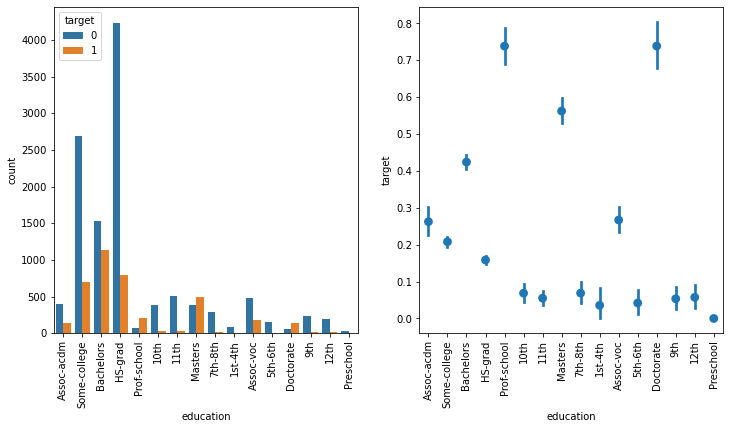

In [21]:
var = categorical_features[1]
print(var)
f, ax = plt.subplots(1,2,figsize=(12,6))

sns.countplot(x=var,hue='target',data=data, ax=ax[0])
plt.sca(ax[0])
plt.xticks(rotation=90)

sns.pointplot(x=var,y='target',data=data, ax=ax[1], join=False)
plt.sca(ax[1])
plt.xticks(rotation=90)

plt.show()

In [22]:
def education(data, var):
    data[f'new_{var}']='level0'

    index = data[(data[var]=='Assoc-acdm') | (data[var]=='Some-college') 
                 | (data[var]=='HS-grad') | (data[var]=='Assoc-voc')].index
    data.loc[index, f'new_{var}'] = 'level1'

    index = data[(data[var]=='Bachelors') | (data[var]=='Masters')].index
    data.loc[index, f'new_{var}'] = 'level2'

    index = data[(data[var]=='Prof-school') | (data[var]=='Doctorate') ].index
    data.loc[index, f'new_{var}'] = 'level3'
    
    return data

data = education(data, var)
test = education(test, var)
categorical_features.append(f'new_{var}')

## marital.status

marital.status


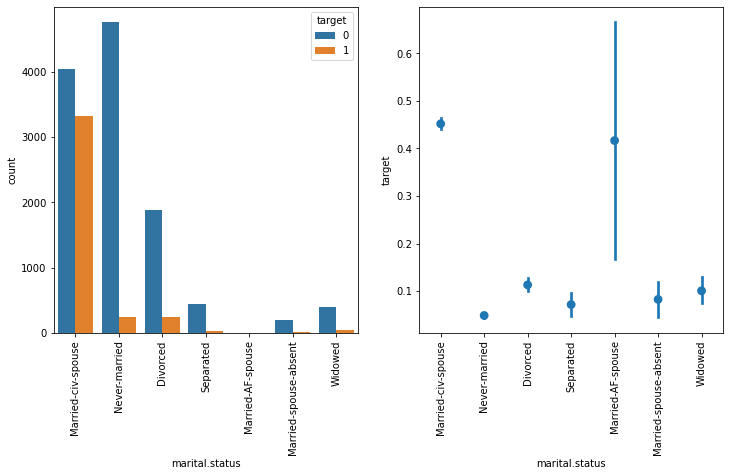

In [23]:
var = categorical_features[2]
print(var)
f, ax = plt.subplots(1,2,figsize=(12,6))

sns.countplot(x=var,hue='target',data=data, ax=ax[0])
plt.sca(ax[0])
plt.xticks(rotation=90)

sns.pointplot(x=var,y='target',data=data, ax=ax[1], join=False)
plt.sca(ax[1])
plt.xticks(rotation=90)

plt.show()

In [24]:
def Marry(data, var):
    data[f'new_{var}']='level0'

    index = data[(data[var]=='Never-married') | (data[var]=='Divorced')].index
    data.loc[index, f'new_{var}'] = 'level1'

    index = data[(data[var]=='Married-civ-spouse') ].index
    data.loc[index, f'new_{var}'] = 'level2'
    
    return data

data = Marry(data, var)
test = Marry(test, var)
categorical_features.append(f'new_{var}')

## occupation

occupation


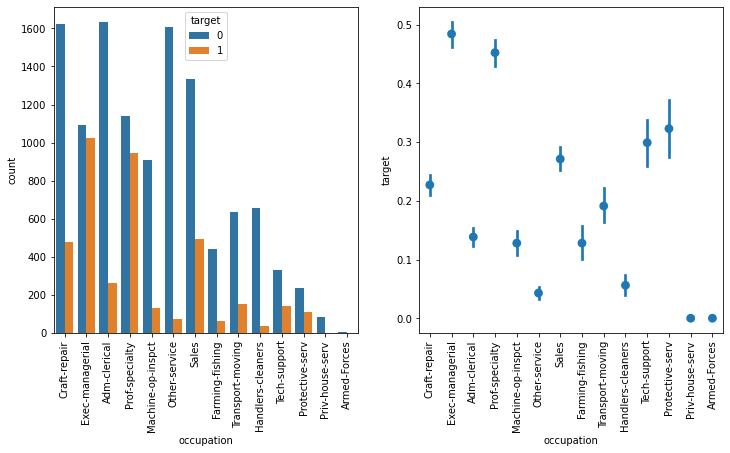

In [25]:
var = categorical_features[3]
print(var)
f, ax = plt.subplots(1,2,figsize=(12,6))

sns.countplot(x=var,hue='target',data=data, ax=ax[0])
plt.sca(ax[0])
plt.xticks(rotation=90)

sns.pointplot(x=var,y='target',data=data, ax=ax[1],join=False)
plt.sca(ax[1])
plt.xticks(rotation=90)

plt.show()

In [26]:
def Occupation(data, var):
    data[f'new_{var}']='level0'

    index = data[(data[var]=='Adm-clerical') | (data[var]=='Machine-op-inspct') 
                 | (data[var]=='Farming-fishing') | (data[var]=='Transport-moving')].index
    data.loc[index, f'new_{var}'] = 'level1'

    index = data[(data[var]=='Craft-repair') | (data[var]=='Sales') 
                 | (data[var]=='Protective-serv') | (data[var]=='Tech-support')].index
    data.loc[index, f'new_{var}'] = 'level2'
    
    index = data[(data[var]=='Exec-managerial') | (data[var]=='Prof-specialty') ].index
    data.loc[index, f'new_{var}'] = 'level3'
    
    return data

data = Occupation(data, var)
test = Occupation(test, var)
categorical_features.append(f'new_{var}')

## relationship

relationship


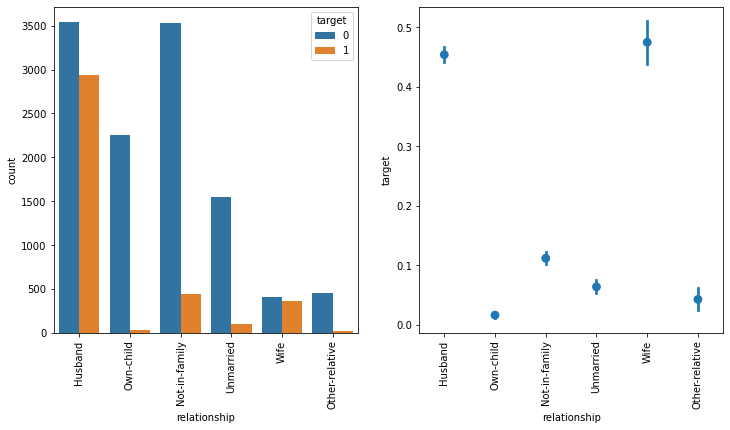

In [27]:
var = categorical_features[4]
print(var)
f, ax = plt.subplots(1,2,figsize=(12,6))

sns.countplot(x=var,hue='target',data=data, ax=ax[0])
plt.sca(ax[0])
plt.xticks(rotation=90)

sns.pointplot(x=var,y='target',data=data, ax=ax[1],join=False)
plt.sca(ax[1])
plt.xticks(rotation=90)

plt.show()

In [28]:
def Relationship(data, var):
    data[f'new_{var}']='level0'

    index = data[(data[var]=='Not-in-family') | (data[var]=='Unmarried') 
                 | (data[var]=='Other-relative')].index
    data.loc[index, f'new_{var}'] = 'level1'

    index = data[(data[var]=='Husband') | (data[var]=='Wife') ].index
    data.loc[index, f'new_{var}'] = 'level2'
    
    return data

data = Relationship(data, var)
test = Relationship(test, var)
categorical_features.append(f'new_{var}')

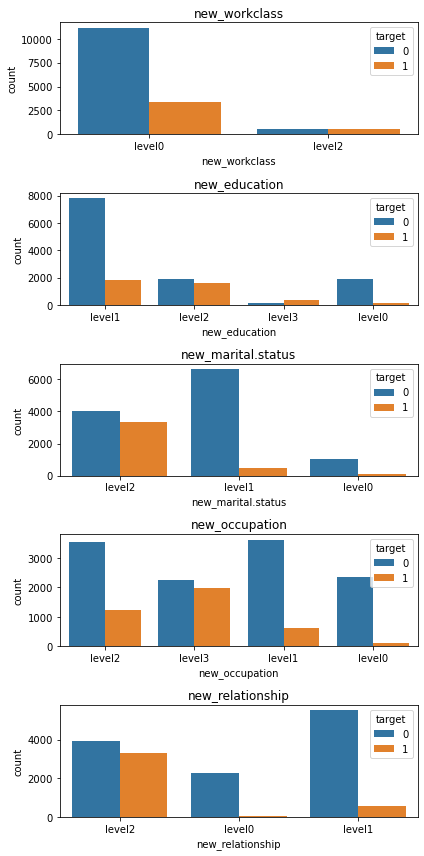

In [29]:
new_features = [ col for col in categorical_features if 'new' in col]
f, ax = plt.subplots(5,1, figsize=(6,12))
for i, var in enumerate(new_features):
    ax[i].set(title=var)
    sns.countplot(x=var,hue='target',data=data, ax=ax[i])
    
plt.tight_layout()
plt.show()

In [30]:
data[categorical_features]=data[categorical_features].astype('object')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15637 entries, 0 to 17473
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 15637 non-null  int64  
 1   workclass           15637 non-null  object 
 2   fnlwgt              15637 non-null  int64  
 3   education           15637 non-null  object 
 4   education.num       15637 non-null  int64  
 5   marital.status      15637 non-null  object 
 6   occupation          15637 non-null  object 
 7   relationship        15637 non-null  object 
 8   capital.gain        15637 non-null  int64  
 9   capital.loss        15637 non-null  int64  
 10  hours.per.week      15637 non-null  int64  
 11  target              15637 non-null  int64  
 12  log_age             15637 non-null  float64
 13  log_fnlwgt          15637 non-null  float64
 14  edu                 15637 non-null  int64  
 15  log_capital.gain    15637 non-null  float64
 16  log_

# Label Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder

for var in categorical_features:
    le = LabelEncoder()
    le.fit(data[var])
    data[var] = le.transform(data[var])
    test[var] = le.transform(test[var])

# Modeling(LGBM)

In [81]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

label = 'target'
y_train = data[label].reset_index()
X_train = data.drop(label, axis=1).reset_index()

print(X_train.shape, y_train.shape)



poly = PolynomialFeatures(3)
poly.fit(X_train[['fnlwgt','age']])

X_train_poly = poly.transform(X_train[['fnlwgt','age']])
X_train_poly = pd.DataFrame(X_train_poly, columns = poly.get_feature_names())


X_test_poly = poly.transform(test[['fnlwgt', 'age']])
X_test_poly = pd.DataFrame(X_test_poly, columns = poly.get_feature_names())


X_train = pd.concat([X_train, X_train_poly], axis=1)
test = pd.concat([test, X_test_poly], axis=1)
X_train.drop(['id'], axis=1, inplace=True)
y_train.drop(['id'], axis=1, inplace=True)
print(X_train.shape, test.shape)

(15637, 23) (15637, 2)
(15637, 28) (15081, 28)


In [89]:
# model
model = LGBMClassifier(random_state=123)


kfold = KFold(n_splits=5, shuffle=True)

print(f'### 5 fold CV of LGBM ###')
cv_result = cross_val_score(model, X_train, y_train, 
                            cv=kfold, scoring='accuracy', n_jobs=-1)
print(f'CV mean:{cv_result.mean()*100:.6f} +- std:{cv_result.std():.6f}\n')

### 5 fold CV of LGBM ###
CV mean:86.410467 +- std:0.003444



# Modeling(XGB)

In [90]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=123)
label = 'target'
kfold = KFold(n_splits=5, shuffle=True)

print(f'### 5 fold CV of XGBM ###')
cv_result = cross_val_score(model, X_train, y_train, 
                            cv=kfold, scoring='accuracy', n_jobs=-1)
print(f'CV mean:{cv_result.mean()*100:.6f} +- std:{cv_result.std():.6f}\n')

### 5 fold CV of XGBM ###
CV mean:86.071484 +- std:0.002505



# Modeling(CBM)

In [91]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(random_state=123)
kfold = KFold(n_splits=5, shuffle=True)

print(f'### 5 fold CV of CGBM ###')
cv_result = cross_val_score(model, X_train, y_train, 
                            cv=kfold, scoring='accuracy', n_jobs=-1)
print(f'CV mean:{cv_result.mean()*100:.6f} +- std:{cv_result.std():.6f}\n')

### 5 fold CV of CGBM ###
CV mean:86.711046 +- std:0.007931



# Tune

In [104]:
BO_lgb.max

{'target': 0.866598931670943,
 'params': {'learning_rate': 0.05718499153947529,
  'max_depth': 16.265173902313215,
  'n_estimators': 204.2847518476008,
  'num_leaves': 41.25695702349479}}

In [103]:
from bayes_opt import BayesianOptimization
lgb_param_bounds = {
    'n_estimators':(100,500),
    'learning_rate':(0.001,0.1),
    'max_depth': (10,25),
    'num_leaves':(20,50)
    
}
def lgb_bo(n_estimators, learning_rate, max_depth, num_leaves):
    lgb_params={
        'n_estimators':int(round(n_estimators)),
        'learning_rate':learning_rate,
        'max_depth':int(max_depth),
        'num_leaves':int(num_leaves)
    }
    model = LGBMClassifier(objective='binary',random_state=123)
    score = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy', n_jobs=-1)
    return score.mean()

BO_lgb = BayesianOptimization(f=lgb_bo, pbounds=lgb_param_bounds, random_state=123)
BO_lgb.maximize(init_points=20, n_iter=20)
max_params = BO_lgb.max['params']
print(max_params)

|   iter    |  target   | learni... | max_depth | n_esti... | num_le... |
-------------------------------------------------------------------------
|  1        |  0.8634   |  0.06995  |  14.29    |  190.7    |  36.54    |
|  2        |  0.8639   |  0.07223  |  16.35    |  492.3    |  40.54    |
|  3        |  0.8651   |  0.04861  |  15.88    |  237.3    |  41.87    |
|  4        |  0.8649   |  0.04442  |  10.9     |  259.2    |  42.14    |
|  5        |  0.8646   |  0.01907  |  12.63    |  312.6    |  35.95    |
|  6        |  0.8635   |  0.06381  |  22.74    |  389.8    |  38.33    |
|  7        |  0.864    |  0.07252  |  14.84    |  244.7    |  26.85    |
|  8        |  0.864    |  0.03008  |  19.46    |  136.8    |  33.01    |
|  9        |  0.8627   |  0.04366  |  17.41    |  270.3    |  29.37    |
|  10       |  0.8624   |  0.04321  |  23.4     |  477.7    |  35.06    |
|  11       |  0.8646   |  0.06277  |  11.73    |  226.9    |  32.44    |
|  12       |  0.8648   |  0.08676  | 

In [114]:
from bayes_opt import BayesianOptimization
cat_param_bounds={
    'n_estimators':(100,200),
    'learning_rate':(0.01,0.1),
    'min_child_samples':(1, 100)
    # 'max_leaves'=None,
    # 'num_leaves'=None,
}
def cat_bo(n_estimators, learning_rate, min_child_samples):
    cat_params={
        'n_estimators':n_estimators,
        'learning_rate':learning_rate,
        'min_child_samples':min_child_samples
    }
    model=CatBoostClassifier(objective='binary', random_state=123)
    score = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy', n_jobs=-1)
    return score.mean()
BO_cat = BayesianOptimization(f=cat_bo, pbounds=cat_param_bounds, random_state=123)
BO_cat.maximize(init_points=10, n_iter=10)
max_params = BO_cat.max['params']
print(max_params)
    

|   iter    |  target   | learni... | min_ch... | n_esti... |
-------------------------------------------------------------
|  1        |  nan      |  0.07268  |  29.33    |  122.7    |
|  2        |  nan      |  0.05962  |  72.23    |  142.3    |
|  3        |  nan      |  0.09827  |  68.8     |  148.1    |
|  4        |  nan      |  0.04529  |  34.97    |  172.9    |
|  5        |  nan      |  0.04947  |  6.908    |  139.8    |
|  6        |  nan      |  0.07642  |  19.07    |  117.5    |
|  7        |  nan      |  0.05784  |  53.65    |  163.4    |
|  8        |  nan      |  0.08645  |  72.72    |  161.1    |
|  9        |  nan      |  0.07502  |  32.97    |  136.2    |
|  10       |  nan      |  0.03054  |  30.08    |  163.1    |


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [54]:
from sklearn.ensemble import VotingClassifier
votingC = VotingClassifier(estimators=[
                           ('LGBM',LGBMClassifier(learning_rate=0.05, n_estimators=139, random_state=123)),
                           ('XGB',XGBClassifier(learning_rate=0.06, n_estimators=156, random_state=123)),
                           ('CBM',CatBoostClassifier(learning_rate=0.04 , n_estimators=172 , random_state=123))]
                          ,voting='soft', n_jobs=-1)


cv_result = cross_val_score(votingC, X_train, y_train, cv=kfold, scoring='accuracy', n_jobs=-1)
print(cv_result.mean())


0.8801953524698346


In [55]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
stackC = StackingClassifier(estimators=[
                           ('LGBM',LGBMClassifier(learning_rate=0.05, n_estimators=139, random_state=123)),
                           ('XGB',XGBClassifier(learning_rate=0.06, n_estimators=156, random_state=123)),
                           ('CBM',CatBoostClassifier(learning_rate=0.04 , n_estimators=172 , random_state=123))]
                          ,final_estimator=RandomForestClassifier(random_state=123), n_jobs=-1)

cv_result = cross_val_score(stackC, X_train, y_train, cv=kfold, scoring='accuracy', n_jobs=-1)
print(cv_result.mean())

0.8686648854924097


In [56]:
votingC.fit(X_train, y_train)
pred = votingC.predict(test)
sub = pd.read_csv('dataset/sample_submission.csv')
sub['target'] = pred
sub.to_csv('result/day5.csv', index=False)

# 결과분석

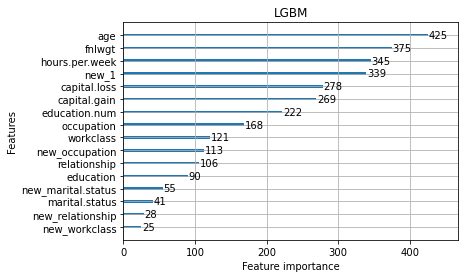

In [38]:
from lightgbm import plot_importance

model = LGBMClassifier(random_state=0)
model.fit(X_train, y_train)
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
plot_importance(model, max_num_features=20, title='LGBM')
plt.show()

Precision:	0.8416316736652669
Recall:		0.7167305236270753


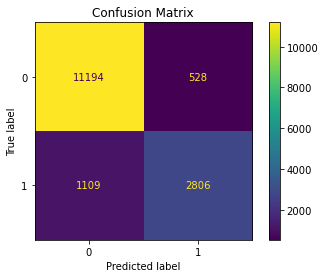

In [39]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score


label=[0, 1] # 라벨 설정
plot = plot_confusion_matrix(model, X_train, y_train,)
plot.ax_.set_title('Confusion Matrix')

y_pred = model.predict(X_train)
y_true = data['target'].to_numpy()
conf = confusion_matrix(y_true, y_pred)
precision=precision_score(y_true, y_pred)
recall=recall_score(y_true, y_pred)
print(f'Precision:\t{precision}')
print(f'Recall:\t\t{recall}')